### Introduction

|CO(GT)|Feature|Integer|True hourly averaged concentration CO in mg/m^3 (reference analyzer) | mg/m^3 |	no

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ryana\Downloads\DataSet\AirQualityUCI.csv", sep=';')
pd.set_option('display.max_columns', None)

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

### Cleaning Data

#### Drop Unused Column

In [6]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

#### Filter Exclude the NaN Value

In [7]:
df = df[df['Date'].notna()]

In [8]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [9]:
df.shape

(9357, 15)

In [10]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### Change Data Type

In [ ]:
cols=[
    'CO(GT)', 'C6H6(GT)',
    'T', 'RH', 'AH'
]

for col in cols:
    df[col] = df[col].str.replace(',','.', regex=False).astype(float)
    print(f"Column {col} has been changed.")

Column CO(GT) has been changed.
Column C6H6(GT) has been changed.
Column T has been changed.
Column RH has been changed.
Column AH has been changed.


In [12]:
#Column Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce') # Ubah kolom 'Date' menjadi format datetime
# df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])


#Column Time
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce') # Ubah format 'Time' dari string ke datetime
df['Time'] = df['Time'].dt.strftime('%H:%M') # Ubah dalam format "HH:MM"

In [13]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3524,2004-08-04,14:00,-200.0,944.0,-200.0,6.0,814.0,-200.0,852.0,-200.0,1489.0,554.0,37.2,23.6,1.4764
4354,2004-09-08,04:00,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0000
8471,2005-02-26,17:00,2.7,967.0,-200.0,3.9,704.0,162.0,888.0,117.0,961.0,609.0,7.4,56.0,0.5797
3880,2004-08-19,10:00,1.2,1031.0,-200.0,6.5,834.0,47.0,793.0,47.0,1640.0,737.0,32.5,39.4,1.8982
9294,2005-04-02,00:00,1.5,965.0,-200.0,5.8,803.0,280.0,802.0,174.0,951.0,889.0,13.1,32.0,0.4817


In [28]:
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

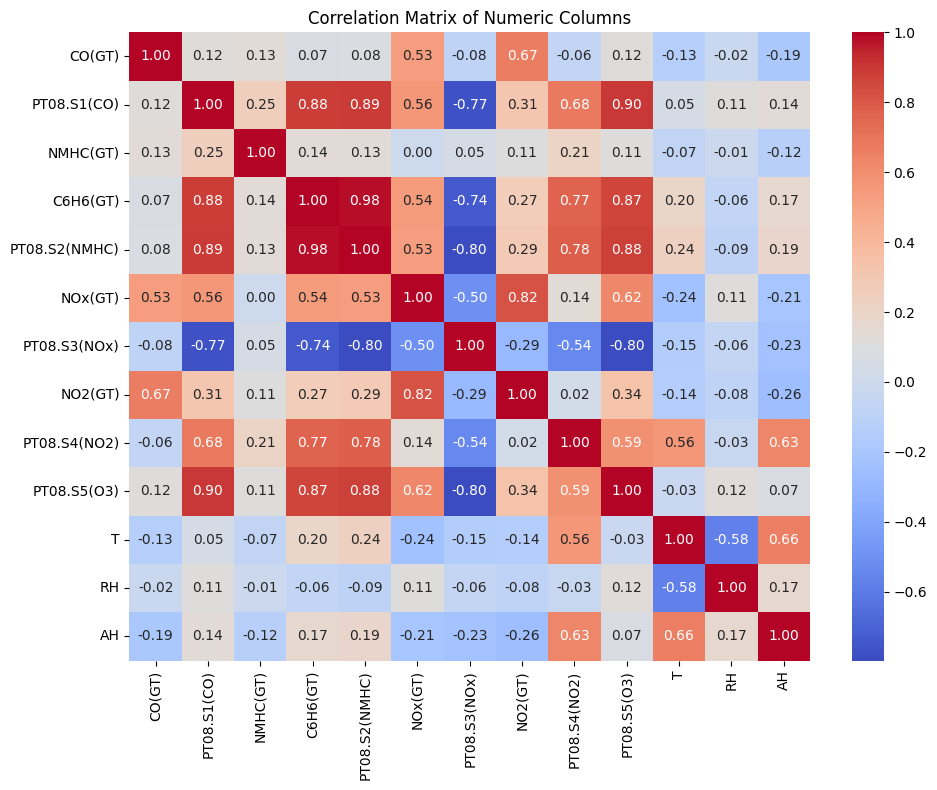

In [29]:
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
# plt.savefig("correlation_heatmap.png")
plt.show()

In [30]:
#Next
numeric_df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.117828,0.130118,0.068549,0.077325,0.532309,-0.081036,0.670099,-0.060633,0.122234,-0.130533,-0.020492,-0.187919
PT08.S1(CO),0.117828,1.000000,0.250628,0.883795,0.892964,0.564630,-0.771938,0.313563,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.130118,0.250628,1.000000,0.136698,0.134317,0.000738,0.052192,0.106870,0.213850,0.111533,-0.068140,-0.014311,-0.123688
C6H6(GT),0.068549,0.883795,0.136698,1.000000,0.981950,0.538118,-0.735744,0.265851,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.077325,0.892964,0.134317,0.981950,1.000000,0.534201,-0.796703,0.285569,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.532309,0.564630,0.000738,0.538118,0.534201,1.000000,-0.503144,0.821199,0.143447,0.622205,-0.242007,0.111562,-0.210105
PT08.S3(NOx),-0.081036,-0.771938,0.052192,-0.735744,-0.796703,-0.503144,1.000000,-0.287317,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.670099,0.313563,0.106870,0.265851,0.285569,0.821199,-0.287317,1.000000,0.024735,0.338367,-0.139509,-0.082190,-0.257482
PT08.S4(NO2),-0.060633,0.682881,0.213850,0.765731,0.777254,0.143447,-0.538468,0.024735,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.122234,0.899324,0.111533,0.865689,0.880578,0.622205,-0.796569,0.338367,0.591144,1.000000,-0.027172,0.124956,0.070751


### Outlier Analysis

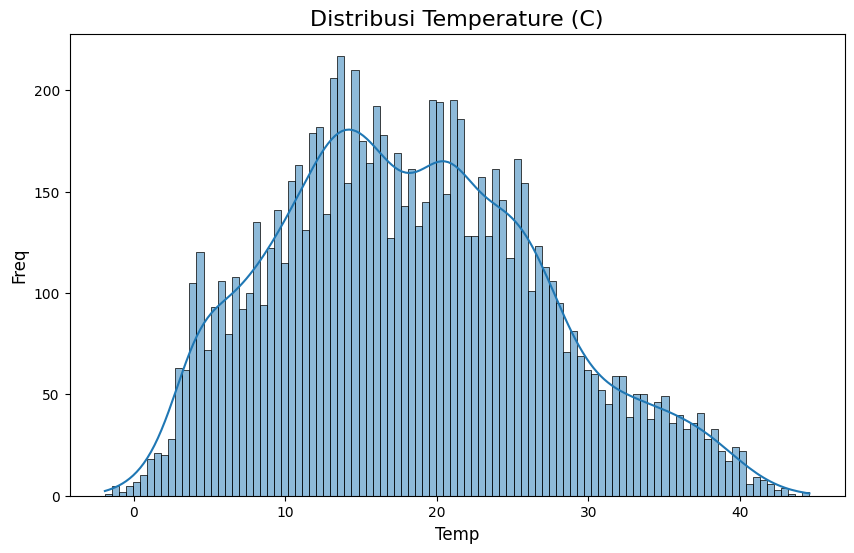

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['T'], bins=100, kde=True)  # bins= menentukan jumlah interval
plt.title('Distribusi Temperature (C)', fontsize=16)
plt.xlabel('Temp', fontsize=12)
plt.ylabel('Freq', fontsize=12)
plt.show()

In [25]:
### drop Value -200
df = df[df['T'] != -200]

In [26]:
df.shape

(8991, 15)

#### Box Plot

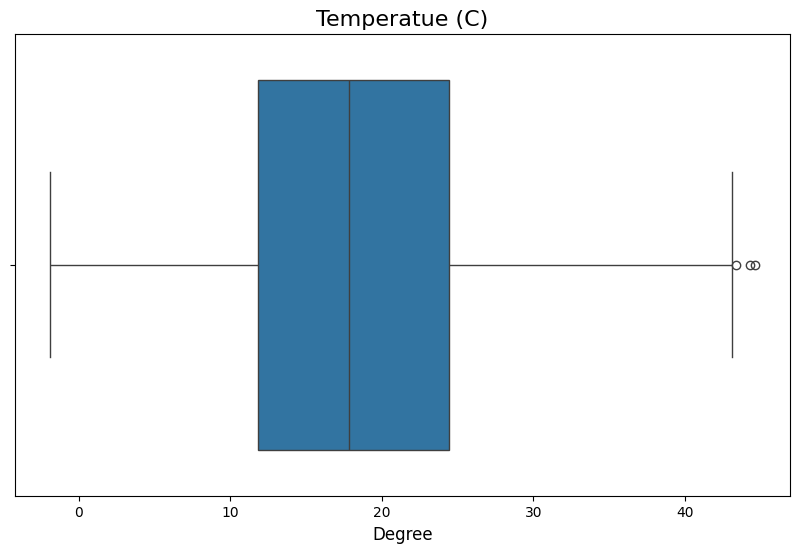

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['T'])
plt.title('Temperatue (C)', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.show()

#### Z-Score

In [35]:
from scipy.stats import zscore

In [ ]:
df['Z_Temp'] = zscore(df['T'])

In [37]:
df[['T','Z_Temp']].head()

,T,Z_Temp
0,13.6,-0.534197
1,13.3,-0.568166
2,11.9,-0.726687
3,11.0,-0.828594
4,11.2,-0.805948


In [45]:
# Menentukan outlier (nilai Z-Score > 3 atau < -3)
outliers = df[(df['Z_Temp'] <= -2.9) | (df['Z_Temp'] >= 2.9)]
print("Outliers Detected:\n", outliers)

Outliers Detected:
            Date   Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
3213 2004-07-22  15:00     2.1       1158.0    -200.0      14.3   
3214 2004-07-22  16:00     2.3       1186.0    -200.0      15.1   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
3213         1126.0    153.0         693.0    143.0        1654.0   
3214         1151.0    166.0         680.0    157.0        1686.0   

      PT08.S5(O3)     T    RH      AH    Z_Temp  
3213       1150.0  44.3  13.0  1.1830  2.941947  
3214       1235.0  44.6  12.6  1.1684  2.975916  


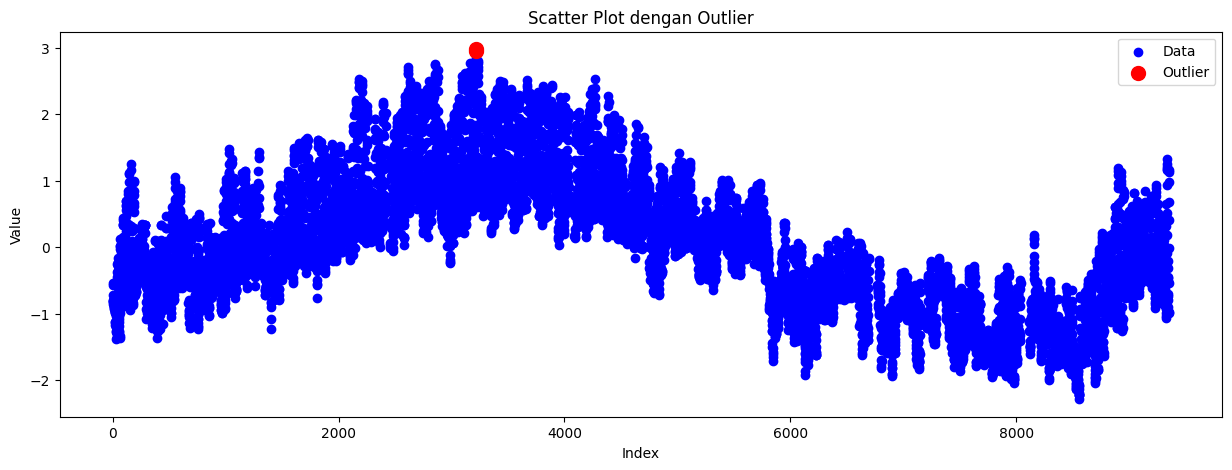

In [46]:
# Visualisasi menggunakan Scatter Plot
plt.figure(figsize=(15, 5))
plt.scatter(df.index, df['Z_Temp'], label='Data', color='blue')

# Menambahkan outlier ke plot
plt.scatter(outliers.index, outliers['Z_Temp'], color='red', label='Outlier', s=100)
plt.title('Scatter Plot dengan Outlier')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()